In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('../data/stress_dataset.csv')

In [3]:
X = train.drop(['Stress Level'], axis=1).values

y = train['Stress Level'].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
print(X_train.shape)
print(X_test.shape)

(8504, 8)
(2126, 8)


In [5]:
#rfc
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=60, random_state=25)

In [6]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=60, random_state=25)

In [7]:
score = rfc.score(X_train,y_train)
print(f"Training Accuracy: {score * 100:.2f}%")

Training Accuracy: 100.00%


In [8]:
from sklearn.metrics import accuracy_score

y_pred = rfc.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 95.34%


In [9]:
import sklearn.metrics
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       417
           1       0.92      0.98      0.95       419
           2       1.00      0.92      0.96       431
           3       0.91      0.97      0.94       417
           4       0.97      0.95      0.96       442

    accuracy                           0.95      2126
   macro avg       0.95      0.95      0.95      2126
weighted avg       0.96      0.95      0.95      2126



In [10]:
y_pred = rfc.predict(X_test )
y_true=y_test

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[394,  23,   0,   0,   0],
       [ 10, 409,   0,   0,   0],
       [  0,  12, 398,  21,   0],
       [  0,   0,   1, 404,  12],
       [  0,   0,   0,  20, 422]])

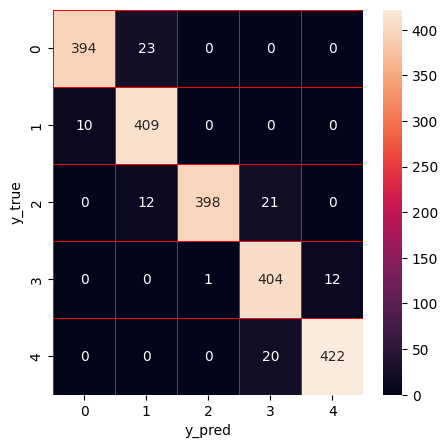

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [19]:
import pickle

pickle.dump(rfc,open('stress_model.pkl','wb'))
stress = pickle.load(open('stress_model.pkl','rb'))

In [13]:
# Navie Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
score = nb_model.score(X_train,y_train)
print(f"Training Accuracy: {score * 100:.2f}%")
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(sklearn.metrics.classification_report(y_test, y_pred))

Training Accuracy: 92.71%
Model Accuracy: 92.33%
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       417
           1       0.88      0.93      0.91       419
           2       0.96      0.88      0.92       431
           3       0.88      0.94      0.91       417
           4       0.96      0.93      0.95       442

    accuracy                           0.92      2126
   macro avg       0.92      0.92      0.92      2126
weighted avg       0.93      0.92      0.92      2126



In [14]:
#Support Vector Classifier
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=9) 
svm_model.fit(X_train, y_train)

score = svm_model.score(X_train,y_train)
print(f"Training Accuracy: {score * 100:.2f}%")
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(sklearn.metrics.classification_report(y_test, y_pred))


Training Accuracy: 93.13%
Model Accuracy: 91.82%
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       417
           1       0.88      0.89      0.89       419
           2       0.94      0.89      0.92       431
           3       0.89      0.92      0.91       417
           4       0.95      0.95      0.95       442

    accuracy                           0.92      2126
   macro avg       0.92      0.92      0.92      2126
weighted avg       0.92      0.92      0.92      2126



In [15]:
#decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=9)
dt_model.fit(X_train, y_train)

train_accuracy = dt_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
y_pred = dt_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {test_accuracy * 100:.2f}%")
print(sklearn.metrics.classification_report(y_test, y_pred))



Training Accuracy: 100.00%
Model Accuracy: 94.73%
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       417
           1       0.93      0.94      0.93       419
           2       0.96      0.95      0.95       431
           3       0.92      0.94      0.93       417
           4       0.97      0.95      0.96       442

    accuracy                           0.95      2126
   macro avg       0.95      0.95      0.95      2126
weighted avg       0.95      0.95      0.95      2126



In [16]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=5000, random_state=9)
log_model.fit(X_train, y_train)

train_accuracy = log_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

y_pred = log_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {test_accuracy * 100:.2f}%")
print(sklearn.metrics.classification_report(y_test, y_pred))


Training Accuracy: 93.05%
Model Accuracy: 92.05%
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       417
           1       0.88      0.90      0.89       419
           2       0.94      0.90      0.92       431
           3       0.89      0.93      0.91       417
           4       0.96      0.94      0.95       442

    accuracy                           0.92      2126
   macro avg       0.92      0.92      0.92      2126
weighted avg       0.92      0.92      0.92      2126



In [17]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train, y_train)

train_accuracy = knn_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

y_pred = knn_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {test_accuracy * 100:.2f}%")
print(sklearn.metrics.classification_report(y_test, y_pred))




Training Accuracy: 93.65%
Model Accuracy: 88.33%
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       417
           1       0.81      0.89      0.85       419
           2       0.94      0.81      0.87       431
           3       0.84      0.89      0.87       417
           4       0.92      0.93      0.93       442

    accuracy                           0.88      2126
   macro avg       0.89      0.88      0.88      2126
weighted avg       0.89      0.88      0.88      2126

